In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import MinMaxScaler,Imputer,StandardScaler,PolynomialFeatures
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)


2. Data Manipulation
3. Exploratory Data Analysis
4. Data preprocessing
5. Model Building
6. Model Performances


# Data Overview

In [147]:
# data loading
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [148]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
print("No of rows \n",data.shape[0])
print("No of columns \n", data.shape[1])
print("Features \n", data.columns.tolist())
print("Missing values \n", data.isnull().sum())
print("Different lables in colunms", data.nunique())

No of rows 
 7043
No of columns 
 21
Features 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing values 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Different lables in colunms customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependen

In [150]:
## function to get details about columns

# numeric columns details
def num_var(df):
    return [col for col in df.columns if df[col].dtypes in ['int','float','int64','float64']]

# categiorical columns details
def cat_var(df):
    return [col for col in df.columns if df[col].dtype == 'O']

# dicrete columns details

def discrete_val(df):
    return [col for col in df.columns if (len(df[col].unique()) < 20) and (col in num_var(df))]

## missing value details :


def missing_val_details(df):
    lst_cat = cat_var(df)
    lst_num = num_var(df)
    print("######################### Categorical columns missing details ############################## \n")
    for c in lst_cat:
        print('{:40} Total count:{:8}    Missing Count:{:10}   per: {:5}'.format(c,df[c].shape[0],\
                                df[c].isnull().sum(),(df[c].isnull().sum()/df[c].shape[0])*100))
    print("\n\n######################### Numerical columns missing details ############################## \n")
    for c in lst_num:
        print('{:40} Total count:{:8}    Missing Count:{:10}   per: {:5}'.format(c,df[c].shape[0],\
                                df[c].isnull().sum(),(df[c].isnull().sum()/df[c].shape[0])*100))
        

def missing_val_grt_ten_pert(df):
    lst_cols = [ col for col in df.columns if (df[col].isnull().sum()/df[col].shape[0]*100) > 10]
    return lst_cols


    

In [151]:
num_var(data)

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [152]:
cat_var(data)

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [154]:
### for detecting nonnumeric in numeric columns

print (data['TotalCharges'][pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()])
# print (data['TotalCharges'].apply(lambda x: isinstance(x, str)))
## you can drop those values or replace with something
print(data.iloc[[6754,6670],])
#data['TotalCharges'].apply(lambda x:  0 if np.isreal(x)!=True else x)

# replace with zero
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float64')

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6754  2775-SEFEE    Male              0      No        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   

     PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
6754          Yes           Yes             DSL            Yes          Yes   
6670          Yes           Yes             DSL             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
6754               No         Yes          No              No  Two year   
6670              Yes         Yes         Yes              No  Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
6754              Yes  Bank transfer (automatic)           61.90                
6670               

In [155]:
print (data['TotalCharges'][pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()])
# print (data['TotalCharges'].apply(lambda x: isinstance(x, str)))

Series([], Name: TotalCharges, dtype: float64)


In [156]:
data.iloc[[6754,6670],]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [157]:
discrete_val(data)

['SeniorCitizen']

In [158]:
missing_val_details(data)

######################### Categorical columns missing details ############################## 

customerID                               Total count:    7043    Missing Count:         0   per:   0.0
gender                                   Total count:    7043    Missing Count:         0   per:   0.0
Partner                                  Total count:    7043    Missing Count:         0   per:   0.0
Dependents                               Total count:    7043    Missing Count:         0   per:   0.0
PhoneService                             Total count:    7043    Missing Count:         0   per:   0.0
MultipleLines                            Total count:    7043    Missing Count:         0   per:   0.0
InternetService                          Total count:    7043    Missing Count:         0   per:   0.0
OnlineSecurity                           Total count:    7043    Missing Count:         0   per:   0.0
OnlineBackup                             Total count:    7043    Missing Count:  

In [159]:
missing_val_grt_ten_pert(data)

[]

# PLOT

In [160]:
## missing value plot 

def missing_na_plot(df):
    plt.figure(figsize=(10,5))
    sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis', cbar=False)
    
    
def corr_plot(df):
    plt.figure(figsize=(10,10))
    sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns,cbar='coolwarm',cmap='viridis', annot=True)
    
def analysis_na(df,target):
    df = df.copy()
    var_lst = [col for col in df.columns if df[col].isnull().sum() > 1]
    # replacing na with 1 and non na with 0
    for var in var_lst:
        df[var] = np.where(df[var].isnull(),1,0)
        df.groupby(var)[target].median().plot.bar()
        plt.title(var)
        plt.show()
        
def scale_max_min(data):
    return (data - data.min())/(data.max()-data.min())


def count_plot(df, col,target,col_list):
    plt.figure(figsize=(5,5))
    if col not in col_list:
        sns.countplot(x=col,hue=target,data=df)
        
        
def cat_value_count_plot(rw,clm,col_list,df):
    ROWS, COLS = rw, clm
    fig, ax = plt.subplots(ROWS, COLS, figsize=(18,18))
    row, col = 0,0
    for i , cat_col in enumerate(cat_var(df)):
        if cat_col not in col_list:
            if col == COLS -1:
                row +=1
            col = i % COLS
            df[cat_col].value_counts().plot('bar', ax=ax[row,col]).set_title(cat_col)
            


# target = 'Churn'
# ROWS, COLS = 4, 4
# fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
# row, col = 0, 0
# for i, categorical_feature in enumerate(cat_var(data)):
#     if categorical_feature != target and categorical_feature !='customerID':
#         if col == COLS - 1:
#             row += 1
#         col = i % COLS
#         data[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5,1,'churned')

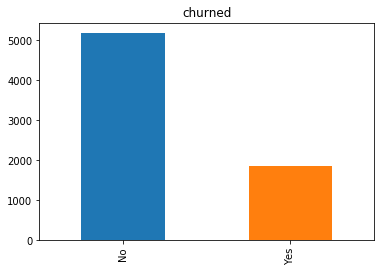

In [161]:
data['Churn'].value_counts().plot('bar').set_title('churned')

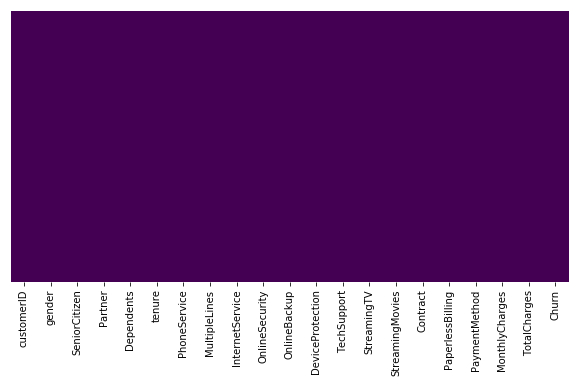

In [162]:
missing_na_plot(data)

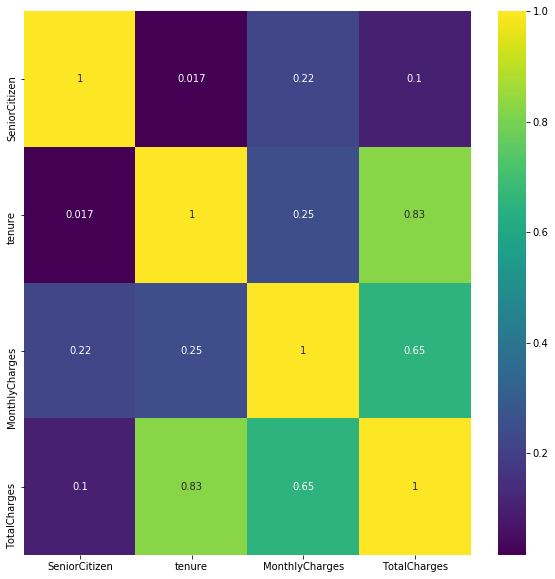

In [163]:
corr_plot(data)

In [164]:
analysis_na(data,'Churn')

In [165]:
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [166]:
col_list = ['customerID']


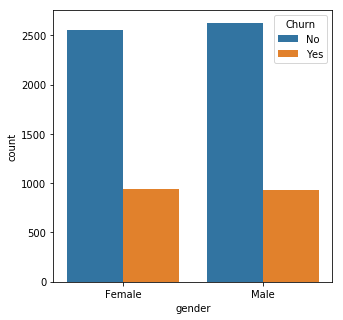

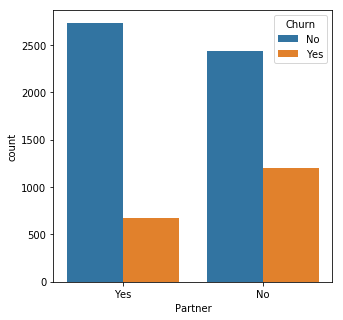

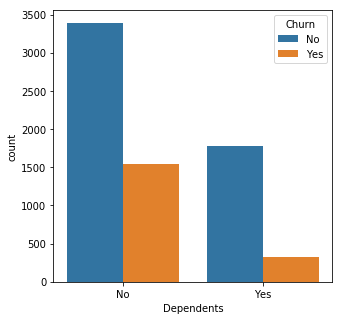

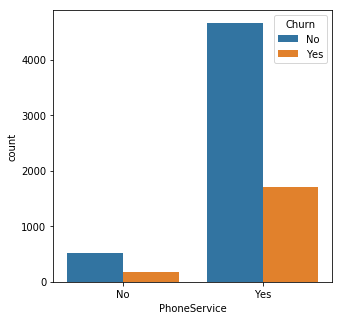

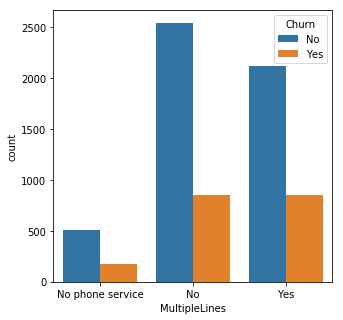

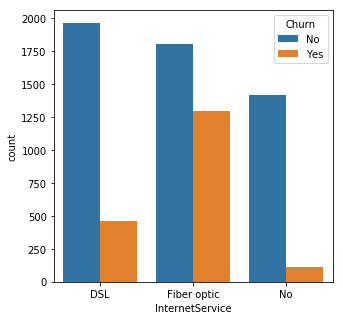

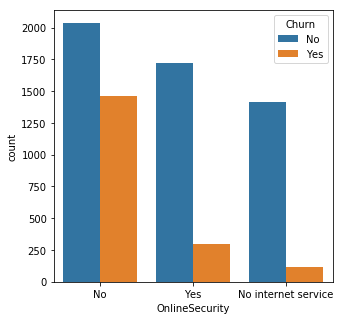

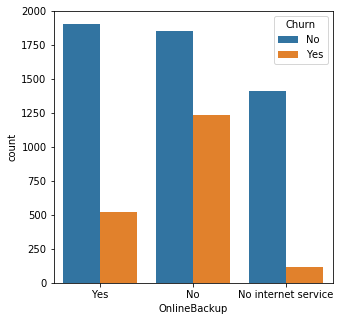

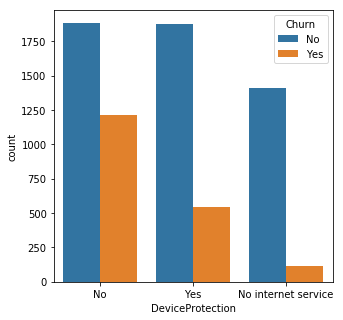

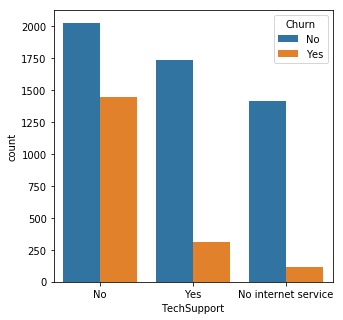

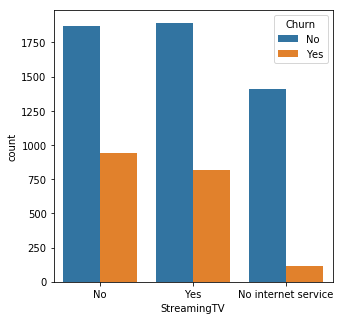

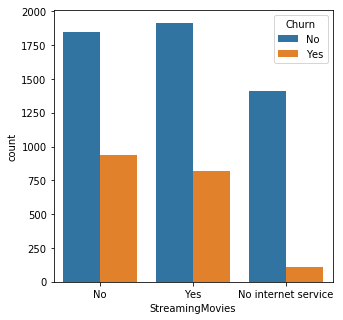

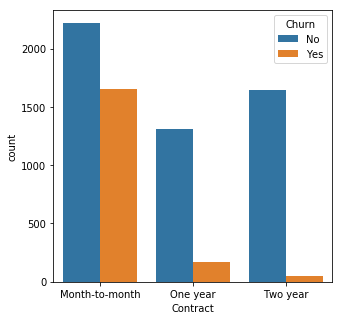

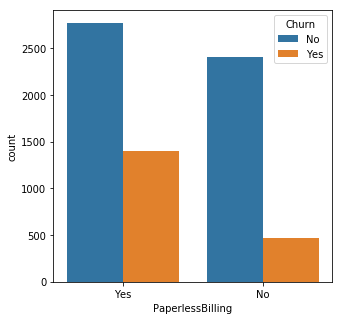

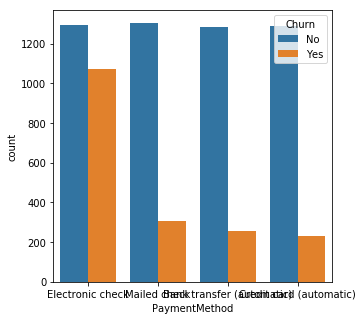

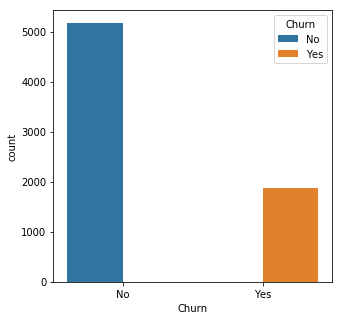

In [167]:
for col in cat_var(data):
    count_plot(data,col,'Churn',col_list)

In [168]:
len(cat_var(data))

17

IndexError: index 4 is out of bounds for axis 0 with size 4

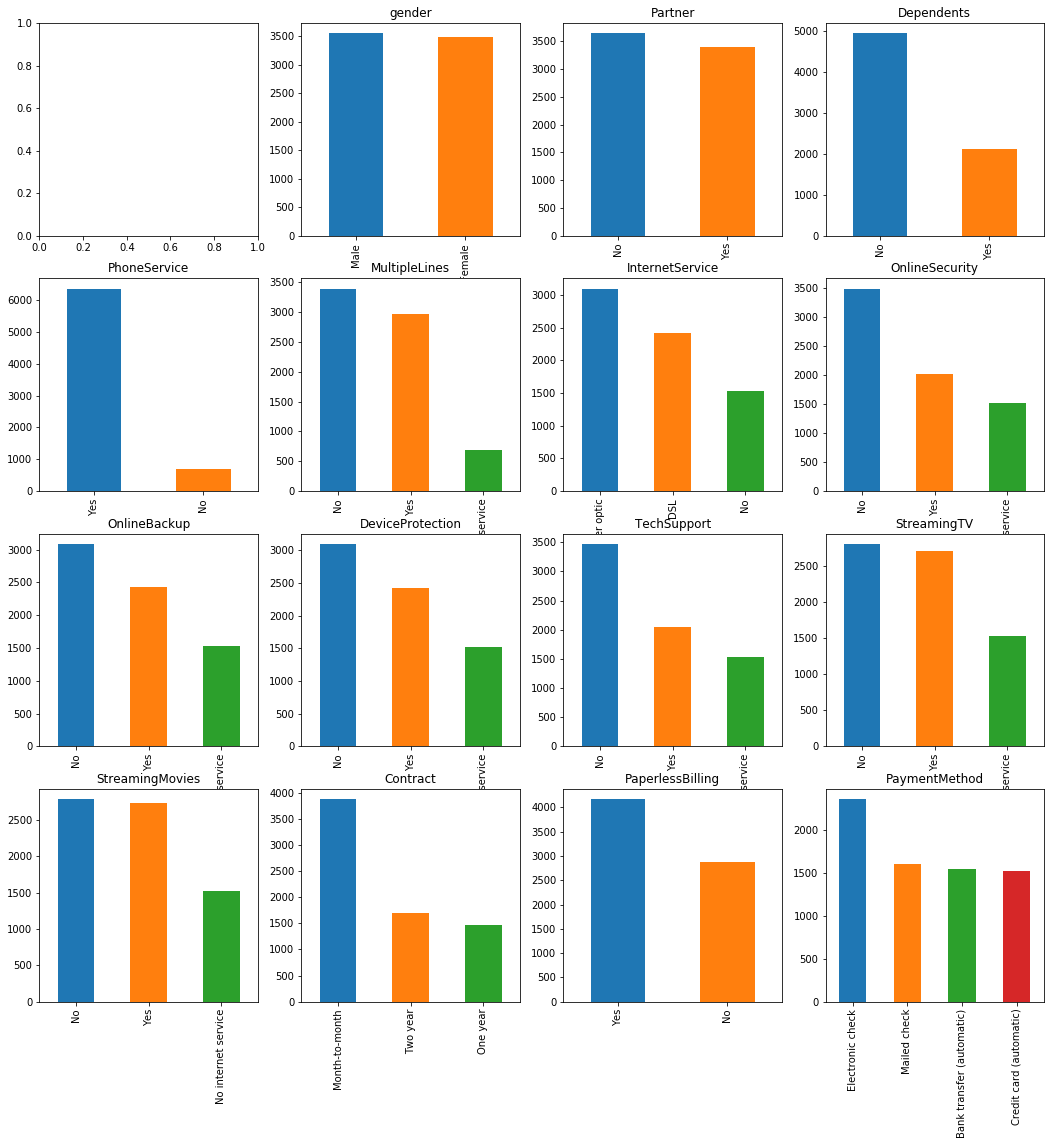

In [169]:
cat_value_count_plot(4,4,col_list,data)

# Numerical column EDA

In [170]:
def num_plot(df,lst_num_col):
    df[lst_num_col].hist(bins=30, figsize=(10, 7))

    
def num_plot_with_target(df, col):
    plt.figure(figsize=(4,2))
    df.loc[df[target] == 'Yes', col].hist(bins=30, color="blue", alpha=0.5)
    df.loc[df[target] == 'No', col].hist(bins=30, color="red", alpha=0.5)
        
def kdeplot(df,feature,target):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df[target] == 'No'][feature].dropna(), color= 'navy', label= 'Target: No')
    ax1 = sns.kdeplot(df[df[target] == 'Yes'][feature].dropna(), color= 'orange', label= 'Target: Yes')
    
    
# fig, ax = plt.subplots(1, 4, figsize=(14, 4))
# data[data.Churn == "No"][num_var(data)].hist(bins=30, color="blue", alpha=0.5, ax=ax)
# data[data.Churn == "Yes"][num_var(data)].hist(bins=30, color="red", alpha=0.5, ax=ax)


In [171]:
num_var(data)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [172]:
lst_num = ['tenure', 'MonthlyCharges', 'TotalCharges']
labels=['Yes','No']

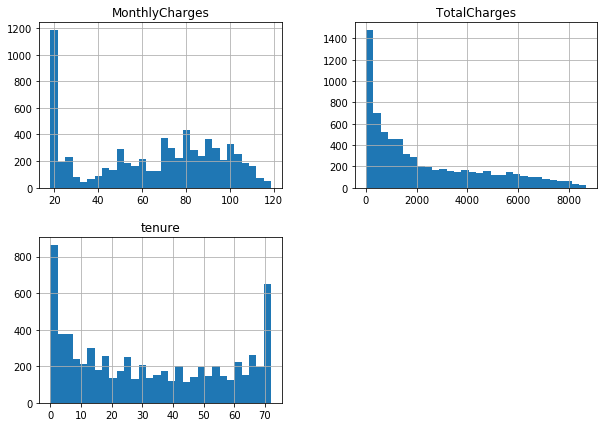

In [173]:
num_plot(data,lst_num)

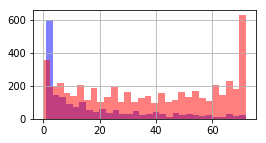

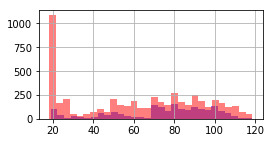

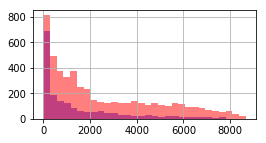

In [174]:
for col in lst_num:
    num_plot_with_target(data,col)

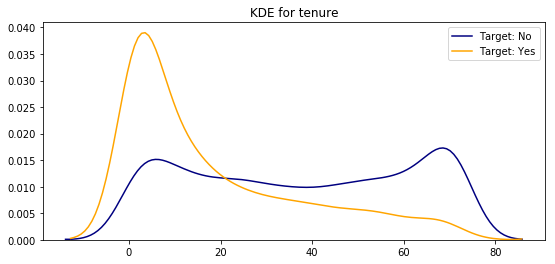

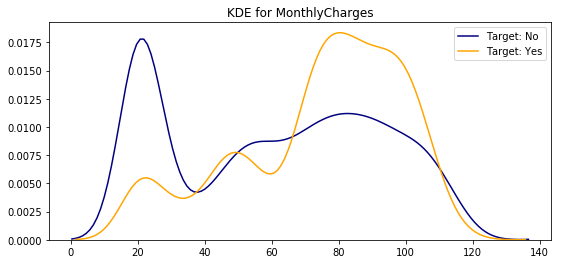

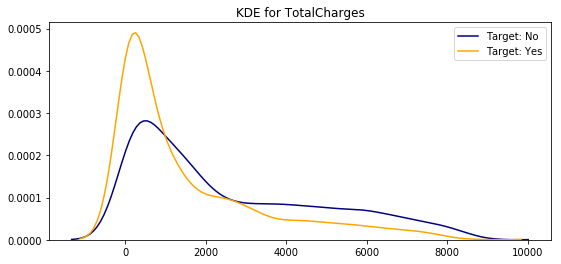

In [175]:
for col in lst_num:
    kdeplot(data,col,target)

# Data preparation

In [176]:
## replacing missing with mode
def fill_categorical_na(df):
    lst_cat = cat_var(df)
    for var in lst_cat:
        df[var] = df[var].fillna(df[var].value_counts().index[0])
    return df
## replacing missing with median
def fill_numerical_na(df):
    lst_num = num_var(df)
    return df[lst_num].fillna(df[lst_num].median())

## outlier handling with interquantile range
def outlier_handling_quantile(df):
    lst_num = num_var(df)
    for var in lst_num:
        firstquartile = df[var].quantile(0.25)
        thirdquartile = df[var].quantile(0.75)
        iqr_range = thirdquartile - firstquartile
        lbound = firstquartile - 1.5*iqr_range
        ubound = thirdquartile - 1.5*iqr_range
        df = df.loc[(df[var]>lbound) & (df[var]<ubound),:]
    return df

## capping for outlier treament
def outlier_handling_capping(df):
    lst_num = num_var(df)
    for var in lst_num:
        perc = df[var].describe(percentiles=[0.01,0.50,0.99])
        df[var] = df[var].apply(lambda x : np.where( perc["99%"] > x and x > perc['1%'], x,
                                                    (np.where(x > perc['99%'],perc['99%'],perc['1%'] ))))
    return df    

In [177]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.000000,7043.000000,7043.000000
mean,0.0,27.033792,64.749566,2277.194426
std,0.0,23.068886,30.062606,2260.001238
min,0.0,1.000000,19.200000,19.750000
25%,0.0,4.000000,35.500000,398.550000
50%,0.0,22.000000,70.350000,1394.550000
75%,0.0,48.000000,89.850000,3786.600000
max,0.0,70.000000,114.716820,8037.867480


In [178]:
outlier_handling_capping(df).describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.000000,7043.000000,7043.000000
mean,0.0,25.867954,64.749495,2277.186307
std,0.0,22.606877,30.062487,2259.980542
min,0.0,1.000000,19.200000,19.750000
25%,0.0,4.000000,35.500000,398.550000
50%,0.0,20.000000,70.350000,1394.550000
75%,0.0,46.000000,89.850000,3786.600000
max,0.0,69.000000,114.709756,8037.062138


Categorical Rare label handling and missing label

In [179]:
def find_frequent_labels(df,var,target,rare_perc):
    tmp = df.groupby(var)[target].count()/df.shape[0]
    return tmp[tmp>rare_perc].index
    
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    df[var_list] = df[var_list].fillna('Missing')
    return df
## creating new label rare for less frequent labels
# for var in cat_var(data):
#     freq_ls = find_frequent_labels(data,var,target,0.01)
#     data[var] = np.where(data[var].isin(freq_ls),data[var],'Rare')

Label encoding and ordinal label

In [180]:
# converting categorical into numerical value
def dummies_conversion(df):
    return pd.get_dummies(df)

# converting categorical variable lables into ordinal based mode of target variable
def replace_categories(df,var,target):
    ordered_labels = df.groupby(var)[target].mode().sort_values().index
    ordered_label = {k:i for i, k in enumerate(ordered_labels,0)}
    df[var] = df[var].map(ordered_label)

In [181]:
## date handling for date column


### categorical column label matching


#train2,test2 = train.align(test, join='outer', axis=1, fill_value=0)


# Get missing columns in the training test
# missing_cols = set( train.columns ) - set( test.columns )
# # Add a missing column in test set with default value equal to 0
# for c in missing_cols:
#     test[c] = 0
# # Ensure the order of column in the test set is in the same order than in train set
# test = test[train.columns]


# X_test = X_test.reindex(columns = X_train.columns)
# for i in range(0,len(X_train.columns)):
# if X_train.columns[i]!=X_test.columns[i]
# print(X_train.columns[i], X_test.column[i])

In [182]:
#Convertin the predictor variable in a binary numeric variable
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Modelling ###

In [271]:
## Train and Test split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Churn','customerID'], axis=1), data['Churn'], 
                                                    test_size=0.3, random_state=42)

In [272]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 1695 to 860
Data columns (total 19 columns):
gender              4930 non-null object
SeniorCitizen       4930 non-null int64
Partner             4930 non-null object
Dependents          4930 non-null object
tenure              4930 non-null int64
PhoneService        4930 non-null object
MultipleLines       4930 non-null object
InternetService     4930 non-null object
OnlineSecurity      4930 non-null object
OnlineBackup        4930 non-null object
DeviceProtection    4930 non-null object
TechSupport         4930 non-null object
StreamingTV         4930 non-null object
StreamingMovies     4930 non-null object
Contract            4930 non-null object
PaperlessBilling    4930 non-null object
PaymentMethod       4930 non-null object
MonthlyCharges      4930 non-null float64
TotalCharges        4930 non-null float64
dtypes: float64(2), int64(2), object(15)
memory usage: 770.3+ KB


In [273]:
X_train = dummies_conversion(X_train)

In [274]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1695,0,54,70.70,3770.00,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1095,0,1,80.55,80.55,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
3889,0,13,19.30,259.65,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3667,1,24,96.55,2263.45,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
2902,1,6,74.10,450.90,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [275]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_train)


In [276]:
from sklearn.metrics import classification_report,confusion_matrix,consensus_score,accuracy_score
print(classification_report(y_train, pred_lr))
print("#############\n")
print(confusion_matrix(y_train,pred_lr))
print('############\n')
print("accuracy :",accuracy_score(y_train,pred_lr))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      3635
          1       0.66      0.53      0.59      1295

avg / total       0.80      0.80      0.80      4930

#############

[[3277  358]
 [ 605  690]]
############

accuracy : 0.8046653144016227


In [277]:
#### test data preparation #####

X_test = dummies_conversion(X_test)
X_test = X_test.reindex(columns = X_train.columns)
for i in range(0,len(X_train.columns)):
    if X_train.columns[i]!=X_test.columns[i]:
        print(X_train.columns[i], X_test.column[i])

In [280]:
x_test_pred = model_lr.predict(X_test)
print(classification_report(y_test, x_test_pred))
print("#############\n")
print(confusion_matrix(y_test,x_test_pred))
print('############\n')
print("accuracy :",accuracy_score(y_test,x_test_pred))

             precision    recall  f1-score   support

          0       0.85      0.90      0.88      1539
          1       0.69      0.57      0.62       574

avg / total       0.81      0.81      0.81      2113

#############

[[1389  150]
 [ 246  328]]
############

accuracy : 0.812588736393753


In [234]:
prob_lr[:,1].shape

(4930,)

In [235]:
y_train.shape

(4930,)

In [249]:
from sklearn.metrics import precision_recall_curve
prob_lr = model_lr.predict_proba(X_train) 
precisions, recalls, thresholds = precision_recall_curve(y_train, prob_lr[:,1])
fpr, tpr , thresholds_roc = roc_curve(y_train,prob_lr[:,1])

In [250]:
print(precisions.shape, recalls.shape, thresholds.shape)
print(fpr.shape,tpr.shape,thresholds_roc.shape)

(4719,) (4719,) (4718,)
(1348,) (1348,) (1348,)


In [251]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.xlabel("threshold")
    plt.ylim([0,1])
    plt.legend(loc="upper left")
    
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel('ftr')
    plt.ylabel('tpr')


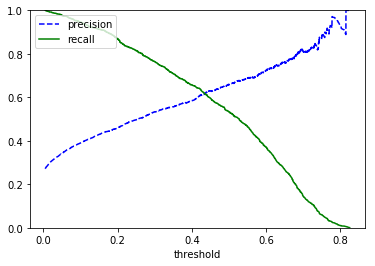

In [252]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

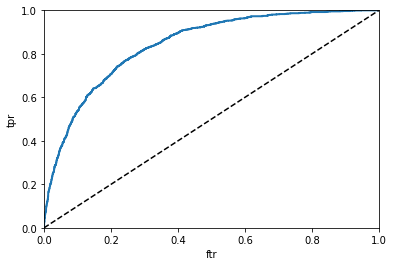

In [253]:
plot_roc_curve(fpr,tpr)
plt.show()

### Random forest

In [262]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_train)

In [263]:
from sklearn.metrics import classification_report,confusion_matrix,consensus_score,accuracy_score
print(classification_report(y_train, pred_rf))
print("#############\n")
print(confusion_matrix(y_train,pred_rf))
print('############\n')
print("accuracy :",accuracy_score(y_train,pred_rf))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3635
          1       0.98      0.93      0.95      1295

avg / total       0.98      0.98      0.98      4930

#############

[[3616   19]
 [  95 1200]]
############

accuracy : 0.9768762677484787


In [282]:
x_test_pred1 = model_rf.predict(X_test)
print(classification_report(y_test, x_test_pred1))
print("#############\n")
print(confusion_matrix(y_test,x_test_pred1))
print('############\n')
print("accuracy :",accuracy_score(y_test,x_test_pred1))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1539
          1       0.65      0.46      0.54       574

avg / total       0.77      0.79      0.77      2113

#############

[[1394  145]
 [ 308  266]]
############

accuracy : 0.7856128726928537


In [264]:
pred_rf

array([0, 1, 0, ..., 0, 1, 0])

In [256]:
X_train.shape

(4930, 45)

In [265]:
from sklearn.metrics import precision_recall_curve
prob_rf = model_rf.predict_proba(X_train) 
precisions, recalls, thresholds = precision_recall_curve(y_train, prob_rf[:,1])
fpr, tpr , thresholds_roc = roc_curve(y_train,prob_rf[:,1])

In [266]:
print(precisions.shape, recalls.shape, thresholds.shape)
print(fpr.shape,tpr.shape,thresholds_roc.shape)

(25,) (25,) (24,)
(28,) (28,) (28,)


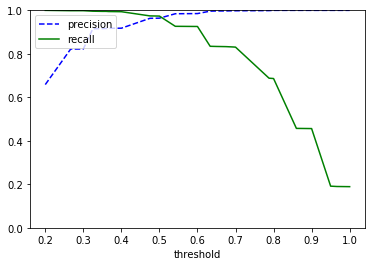

In [267]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

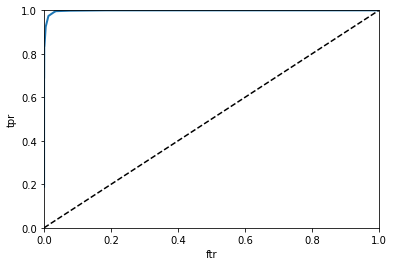

In [268]:
plot_roc_curve(fpr,tpr)
plt.show()

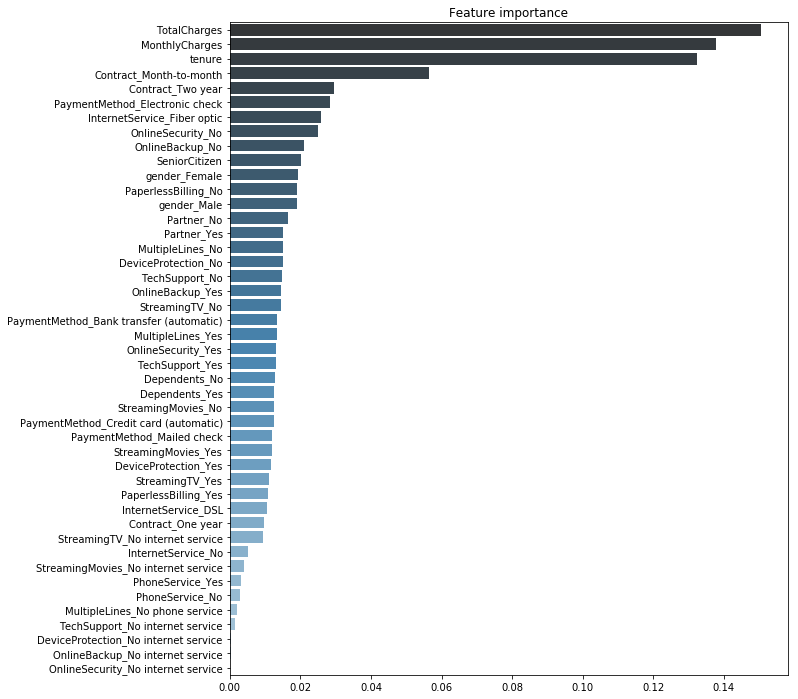

In [284]:
# Plot features importances
imp = pd.Series(data=model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')